## Task 3: Customer Segmentation / Clustering
#### Perform customer segmentation using clustering techniques. Use both profile information (from Customers.csv) and transaction information (from Transactions.csv).
● You have the flexibility to choose any clustering algorithm and any number of clusters in
between(2 and 10)
● Calculate clustering metrics, including the DB Index(Evaluation will be done on this).
● Visualise your clusters using relevant plots.
Deliverables:
● A report on your clustering results, including:
○ The number of clusters formed.
○ DB Index value.
○ Other relevant clustering metrics.
● A Jupyter Notebook/Python script containing your clustering code.
## Evaluation Criteria:
● Clustering logic and metrics.
● Visual representation of clusters.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
customers = pd.read_csv("C://Users//Shreyash Verma//Desktop//Zeotap-Intern//Customers.csv")
transactions = pd.read_csv("C://Users//Shreyash Verma//Desktop//Zeotap-Intern//Transactions.csv")

In [6]:
merged = transactions.merge(customers, on="CustomerID", how="left")

In [7]:
merged

TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0          T00001      C0199      P067  2024-08-25 12:38:23         1   
1          T00112      C0146      P067  2024-05-27 22:23:54         1   
2          T00166      C0127      P067  2024-04-25 07:38:55         1   
3          T00272      C0087      P067  2024-03-26 22:55:37         2   
4          T00363      C0070      P067  2024-03-21 15:10:10         3   
..            ...        ...       ...                  ...       ...   
995        T00496      C0118      P037  2024-10-24 08:30:27         1   
996        T00759      C0059      P037  2024-06-04 02:15:24         3   
997        T00922      C0018      P037  2024-04-05 13:05:32         4   
998        T00959      C0115      P037  2024-09-29 10:16:02         2   
999        T00992      C0024      P037  2024-04-21 10:52:24         1   

     TotalValue   Price          CustomerName         Region  SignupDate  
0        300.68  300.68        Andrea Jenkins         Europe  2022-12-03  
1        300.68  300.68       Brittany Harvey           Asia  2024-09-04  
2        300.68  300.68       Kathryn Stevens         Europe  2024-04-04  
3        601.36  300.68       Travis Campbell  South America  2024-04-11  
4        902.04  300.68         Timothy Perez         Europe  2022-03-15  
..          ...     ...                   ...            ...         ...  
995      459.86  459.86            Jacob Holt  South America  2022-01-22  
996     1379.58  459.86  Mrs. Kimberly Wright  North America  2024-04-07  
997     1839.44  459.86          Tyler Haynes  North America  2024-09-21  
998      919.72  459.86       Joshua Hamilton           Asia  2024-11-11  
999      459.86  459.86        Michele Cooley  North America  2024-02-05  

[1000 rows x 10 columns]

In [8]:
customer_features = merged.groupby("CustomerID").agg({
    "TotalValue": "sum",       # Total spend
    "TransactionID": "count",  # Number of transactions
    "Quantity": "sum",         # Total quantity purchased
    "Region": "first",         # Customer region
}).reset_index()

In [9]:
customer_features

CustomerID  TotalValue  TransactionID  Quantity         Region
0        C0001     3354.52              5        12  South America
1        C0002     1862.74              4        10           Asia
2        C0003     2725.38              4        14  South America
3        C0004     5354.88              8        23  South America
4        C0005     2034.24              3         7           Asia
..         ...         ...            ...       ...            ...
194      C0196     4982.88              4        12         Europe
195      C0197     1928.65              3         9         Europe
196      C0198      931.83              2         3         Europe
197      C0199     1979.28              4         9         Europe
198      C0200     4758.60              5        16           Asia

[199 rows x 5 columns]

In [10]:
encoder = OneHotEncoder()
encoded_region = encoder.fit_transform(customer_features[["Region"]]).toarray()

In [11]:
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(customer_features[["TotalValue", "TransactionID", "Quantity"]])
feature_matrix = np.hstack([normalized_values, encoded_region])

### Clustering code

In [12]:
db_scores = []
clusters_range = range(2, 11)
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(feature_matrix)
    db_index = davies_bouldin_score(feature_matrix, clusters)
    db_scores.append(db_index)

optimal_k = clusters_range[np.argmin(db_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(feature_matrix)
customer_features["Cluster"] = clusters


final_db_index = davies_bouldin_score(feature_matrix, clusters)

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(feature_matrix)
customer_features["PCA1"] = reduced_features[:, 0]
customer_features["PCA2"] = reduced_features[:, 1]

C:\Users\Shreyash Verma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shreyash Verma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shreyash Verma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shreyash Verma\AppData\Roaming\Python\Pytho

In [13]:
kmeans

KMeans(n_clusters=4, random_state=42)

In [14]:
optimal_k

4

In [15]:
final_db_index

0.43125421154304205

In [16]:
pca

PCA(n_components=2)

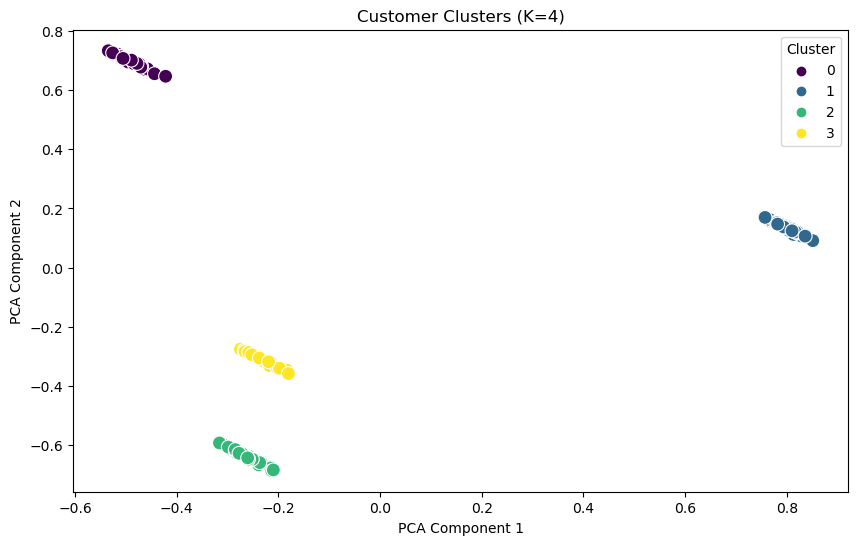

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_features, x="PCA1", y="PCA2", hue="Cluster", palette="viridis", s=100)
plt.title(f"Customer Clusters (K={optimal_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [18]:
print(f"Optimal Number of Clusters: {optimal_k}")
print(f"Davies-Bouldin Index: {final_db_index}")

Optimal Number of Clusters: 4
Davies-Bouldin Index: 0.43125421154304205


In [19]:
customer_features[["CustomerID", "Cluster"]].to_csv("Customer_Clusters.csv", index=False)